<a href="https://colab.research.google.com/github/alefaurelio/Rede_Deteccao_Yolo_DataCoco128/blob/main/Rede_Deteccao_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Clonar repositório YOLOv5 e instalar dependências
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17564, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 17564 (delta 35), reused 7 (delta 7), pack-reused 17507 (from 3)
Receiving objects: 100% (17564/17564), 16.64 MiB | 17.58 MiB/s, done.
Resolving deltas: 100% (12029/12029), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.6 MB/s eta 0:00:00


In [ ]:
import torch
from IPython.display import Image, clear_output

# Verificar se GPU está disponível
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Dispositivo:", device)


Dispositivo: cuda


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
import os
import yaml

base_path = '/content/drive/MyDrive/dataset'

images_train = os.path.join(base_path, 'images/train')
images_val = os.path.join(base_path, 'images/val')

# Lista com os nomes reais das classes, na ordem dos IDs
names = ['pessoa', 'bicicleta', 'carro', 'moto', 'avião', 'ônibus', 'trem', 'caminhão', 'barco', 'semáforo', 'hidrante', 'placa pare', 'parquímetro', 'banco', 'pássaro', 'gato', 'cachorro', 'cavalo', 'navio', 'vaca', 'elefante', 'urso', 'zebra', 'girafa', 'mochila', 'guarda chuva', 'bolsa', 'gravata', 'mala', 'frisbee', 'esquis', 'snowboard', 'bola', 'pipa', 'taco de beisebol', 'luva de beisebol', 'skate', 'prancha de surf', 'raquete de tenis', 'garrafa', 'taça de vinho', 'xícara', 'garfo', 'faca', 'colher', 'tigela', 'banana', 'maçã', 'sanduíche', 'laranja', 'brócolis', 'cenoura', 'cachorro quente', 'pizza', 'donut', 'bolo', 'cadeira', 'sofá', 'vaso de planta', 'cama', 'mesa de jantar', 'banheiro', 'tv', 'laptop', 'mouse', 'controle remoto', 'teclado', 'celular', 'microondas', 'forno', 'torradeira', 'pia', 'geladeira', 'livro', 'relógio', 'vaso', 'tesoura', 'ursinho de pelúcia', 'secador de cabelo', 'escova de dentes']  # substitua pela sua lista


# Número de classes
nc = len(names)
print(f"Número de classes: {nc}")

data = {
    'train': images_train,
    'val': images_val,
    'nc': nc,
    'names': names
}

yaml_path = os.path.join(base_path, 'data.yaml')
with open(yaml_path, 'w') as f:
    yaml.dump(data, f, default_flow_style=False)

print(f"Arquivo data.yaml atualizado com nomes reais das classes em: {yaml_path}")


Número de classes: 80
Arquivo data.yaml atualizado com nomes reais das classes em: /content/drive/MyDrive/dataset/data.yaml


/usr/local/lib/python3.12/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-8-26 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 45.1MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


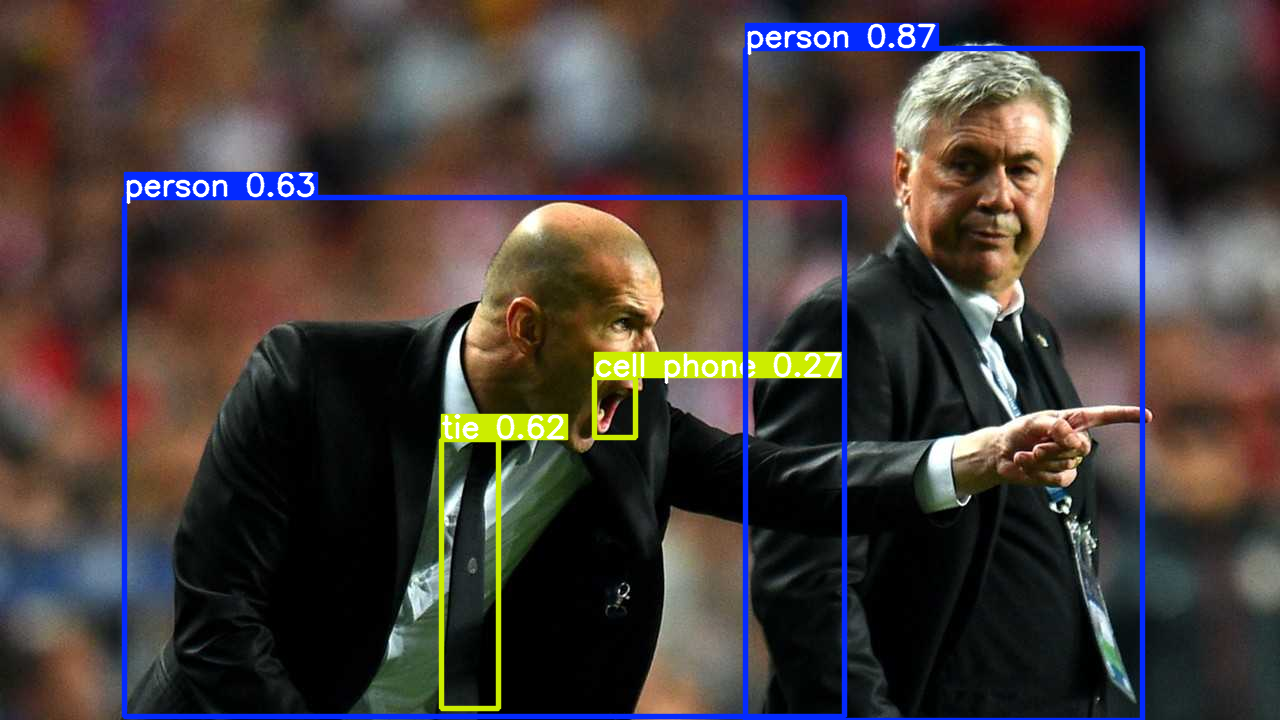

In [ ]:
# Carregar modelo YOLOv5 pré-treinado
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Testar em uma imagem de exemplo
img = 'https://ultralytics.com/images/zidane.jpg'
results = model(img)
results.show()


In [ ]:
!python train.py --img 640 --batch 16 --epochs 50 \
--data /content/drive/MyDrive/dataset/data.yaml \
--weights yolov5s.pt \
--device 0 \
--cache


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-08-26 18:16:29.662091: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756232189.699757    1605 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756232189.715583    1605 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1756232189.743593    1605 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1756232189.743630    1605 computation_placer.cc:177] computation placer already registere

YOLOv5 🚀 2025-8-26 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Carregando modelo de: runs/train/exp/weights/best.pt


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


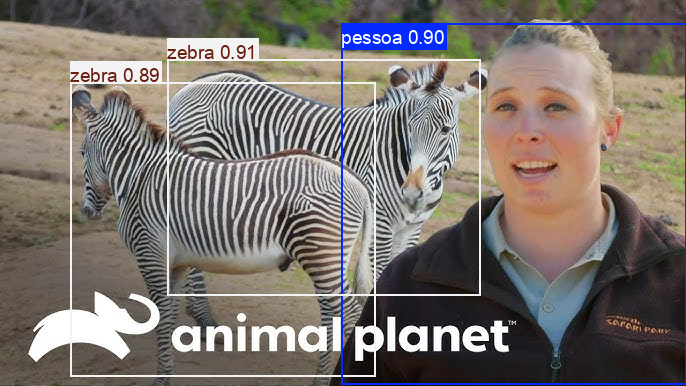

In [ ]:
import glob
import torch

# Procurar o arquivo best.pt mais recente dentro de runs/train/
weights_list = glob.glob('runs/train/exp*/weights/best.pt')
if len(weights_list) == 0:
    raise FileNotFoundError("Nenhum arquivo best.pt encontrado. Execute o treino primeiro.")

# Selecionar o último arquivo encontrado
weights_path = weights_list[-1]
print(f"Carregando modelo de: {weights_path}")

# Carregar o modelo treinado
trained_model = torch.hub.load('/content/yolov5', 'custom', path=weights_path, source='local')

# Testar em uma imagem do dataset de validação
img_test = '/content/drive/MyDrive/dataset/images/test/test001.jpg'  # ajuste conforme sua imagem
results = trained_model(img_test)
results.show()